In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'class_data.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [5]:
x = np.array(list(zip(df['BP'], df['Cholesterol'], df['Na_to_K'])))
pd.set_option('future.no_silent_downcasting', True)
y = np.array(df['Drug'])
df['BP'] = df['BP'].replace('HIGH', 0)
df['BP'] = df['BP'].replace('LOW', 1)
df['BP'] = df['BP'].replace('NORMAL', 2)

df['Cholesterol'] = df['Cholesterol'].replace('HIGH', 0)
df['Cholesterol'] = df['Cholesterol'].replace('NORMAL', 1)
x

array([[ 0.   ,  0.   , 25.355],
       [ 1.   ,  0.   , 13.093],
       [ 1.   ,  0.   , 10.114],
       [ 2.   ,  0.   ,  7.798],
       [ 1.   ,  0.   , 18.043],
       [ 2.   ,  0.   ,  8.607],
       [ 2.   ,  0.   , 16.275],
       [ 1.   ,  0.   , 11.037],
       [ 2.   ,  0.   , 15.171],
       [ 1.   ,  1.   , 19.368],
       [ 1.   ,  0.   , 11.767],
       [ 0.   ,  1.   , 19.199],
       [ 1.   ,  0.   , 15.376],
       [ 1.   ,  0.   , 20.942],
       [ 2.   ,  0.   , 12.703],
       [ 0.   ,  1.   , 15.516],
       [ 1.   ,  1.   , 11.455],
       [ 0.   ,  0.   , 13.972],
       [ 1.   ,  0.   ,  7.298],
       [ 0.   ,  1.   , 25.974],
       [ 1.   ,  1.   , 19.128],
       [ 2.   ,  0.   , 25.917],
       [ 1.   ,  1.   , 30.568],
       [ 1.   ,  0.   , 15.036],
       [ 1.   ,  0.   , 33.486],
       [ 0.   ,  1.   , 18.809],
       [ 0.   ,  0.   , 30.366],
       [ 2.   ,  1.   ,  9.381],
       [ 1.   ,  1.   , 22.697],
       [ 1.   ,  0.   , 17.951],
       [ 2

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,train_size = 0.8, random_state= 100)

In [9]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)

RandomForestClassifier()

In [7]:
from sklearn.tree import DecisionTreeClassifier

model_2 = DecisionTreeClassifier(random_state=0)
model_2.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [12]:
ans_train = model.predict(x_train)
ans_test = model.predict(x_test)


In [13]:
ans_train_1 = model_2.predict(x_train)
ans_test_1 = model_2.predict(x_test)

In [14]:
from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(y_train, ans_train)
accuracy_test = accuracy_score(y_test, ans_test)

print(f'accuracy_score_train:', accuracy_train)
print(f'accuracy_score_test:', accuracy_test)

accuracy_score_train: 1.0
accuracy_score_test: 0.9


In [15]:
from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(y_train, ans_train_1)
accuracy_test = accuracy_score(y_test, ans_test_1)

print(f'accuracy_score_train:', accuracy_train)
print(f'accuracy_score_test:', accuracy_test)

accuracy_score_train: 1.0
accuracy_score_test: 0.9


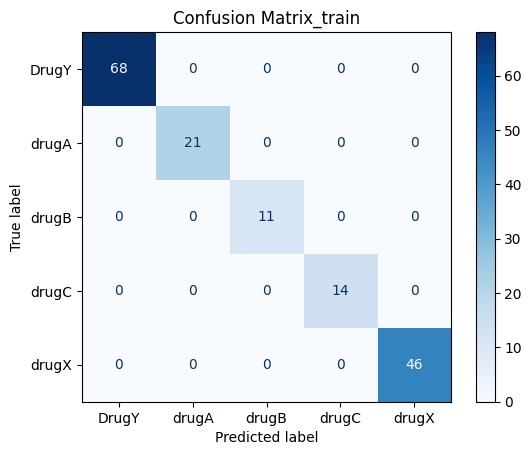

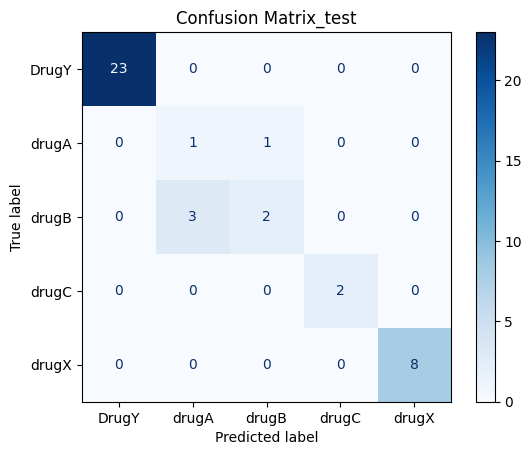

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_train = confusion_matrix(y_train, ans_train)
cm_test = confusion_matrix(y_test, ans_test)

disp_1 =  ConfusionMatrixDisplay(confusion_matrix= cm_train, display_labels=model.classes_)
disp_2 =  ConfusionMatrixDisplay(confusion_matrix= cm_test, display_labels=model.classes_)
disp_1.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix_train')
disp_2.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix_test')
plt.show()

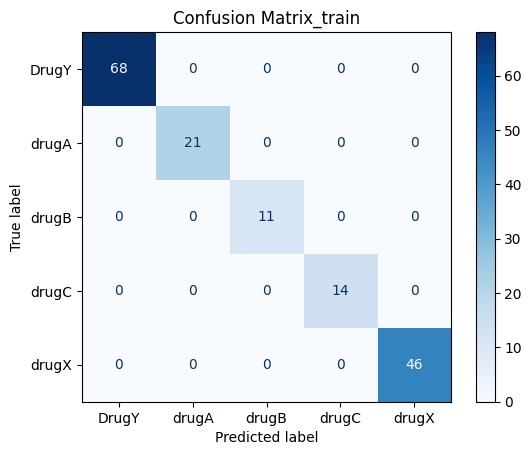

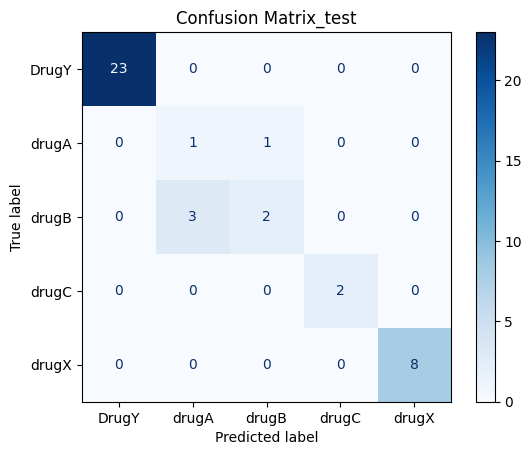

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_train = confusion_matrix(y_train, ans_train_1)
cm_test = confusion_matrix(y_test, ans_test_1)

disp_1 =  ConfusionMatrixDisplay(confusion_matrix= cm_train, display_labels=model.classes_)
disp_2 =  ConfusionMatrixDisplay(confusion_matrix= cm_test, display_labels=model.classes_)
disp_1.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix_train')
disp_2.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix_test')
plt.show()

In [67]:
from sklearn.metrics import classification_report

report_train = classification_report(y_train, ans_train, output_dict= True)
report_test = classification_report(y_test, ans_test, output_dict= True)

n = pd.DataFrame(report_train).transpose()
print(n)
p = pd.DataFrame(report_test).transpose()
print(p)

              precision  recall  f1-score  support
DrugY               1.0     1.0       1.0     68.0
drugA               1.0     1.0       1.0     21.0
drugB               1.0     1.0       1.0     11.0
drugC               1.0     1.0       1.0     14.0
drugX               1.0     1.0       1.0     46.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0    160.0
weighted avg        1.0     1.0       1.0    160.0
              precision  recall  f1-score  support
DrugY          1.000000    1.00  1.000000     23.0
drugA          0.250000    0.50  0.333333      2.0
drugB          0.666667    0.40  0.500000      5.0
drugC          1.000000    1.00  1.000000      2.0
drugX          1.000000    1.00  1.000000      8.0
accuracy       0.900000    0.90  0.900000      0.9
macro avg      0.783333    0.78  0.766667     40.0
weighted avg   0.920833    0.90  0.904167     40.0


In [17]:
from sklearn.metrics import classification_report

report_train = classification_report(y_train, ans_train_1, output_dict= True)
report_test = classification_report(y_test, ans_test_1, output_dict= True)

n = pd.DataFrame(report_train).transpose()
print(n)
p = pd.DataFrame(report_test).transpose()
print(p)

              precision  recall  f1-score  support
DrugY               1.0     1.0       1.0     68.0
drugA               1.0     1.0       1.0     21.0
drugB               1.0     1.0       1.0     11.0
drugC               1.0     1.0       1.0     14.0
drugX               1.0     1.0       1.0     46.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0    160.0
weighted avg        1.0     1.0       1.0    160.0
              precision  recall  f1-score  support
DrugY          1.000000    1.00  1.000000     23.0
drugA          0.250000    0.50  0.333333      2.0
drugB          0.666667    0.40  0.500000      5.0
drugC          1.000000    1.00  1.000000      2.0
drugX          1.000000    1.00  1.000000      8.0
accuracy       0.900000    0.90  0.900000      0.9
macro avg      0.783333    0.78  0.766667     40.0
weighted avg   0.920833    0.90  0.904167     40.0
